<a href="https://colab.research.google.com/github/joaochenriques/IST_MCTE/blob/main/Barrages/SpecificSpeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import Callable, List, Tuple
import matplotlib.pyplot as mpl
import numpy as np
import pathlib, os

In [6]:
if not pathlib.Path("mpl_utils.py").exists():
  os.system( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

# mpl.rcParams["figure.figsize"] = (12, 3)

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

try:
    from dataclassy import dataclass
except ModuleNotFoundError:
    os.system( "pip install dataclassy")
    from dataclassy import dataclass

In [13]:
@dataclass
class TurbineModel:

  # flow rate: red line of the map
  poly_CQ1: np.poly1d = np.poly1d( np.array([0.16928201, 0.08989368]) )

  # flow rate: green line of the map
  poly_CQ2: np.poly1d = np.poly1d( np.array([-3.63920467e-04,  9.37677378e-03,
                                         -9.25873626e-02,  1.75687197e+00]) )

  # efficiency: red line of the map
  poly_CE1: np.poly1d = np.poly1d( np.array([-0.02076456, 0.20238444,
                                              0.48984553]) )
  # efficiency: green line of the map
  poly_CE2: np.poly1d = np.poly1d( np.array([-2.75685709e-04,  2.04822984e-03,
                                             6.86081825e-04,  7.93083108e-01]) )

  η_max: float = 0.912  # [-] maximum efficiency

  # n11 interpolation domain
  n11_min: float =  4.38    # [-]
  n11_max: float = 17.17    # [-]
  n11_r2g: float =  7.92193 # [-] red to green point

  # other data
  ga: float = 9.8         # [m/s²] gravity aceleration
  ρw: float = 1025.0      # kg/m³] water density

  def n11_range( self ) -> tuple:
    return ( self.n11_min, self.n11_max )

  # dimensionless flow rate
  def Q11( self, n11: float ) -> float:
    assert( n11 >= self.n11_min ), "n11 small than admissable minimum"
    assert( n11 <= self.n11_max ), "n11 greater than admissable maximum"
    if n11 < self.n11_r2g:
      return self.poly_CQ1( n11 )
    else:
      return self.poly_CQ2( n11 )

  # efficiency
  def eta( self, n11: float ) -> float:
    assert( n11 >= self.n11_min ), "n11 small than admissable minimum"
    assert( n11 <= self.n11_max ), "n11 greater than admissable maximum"
    if n11 < self.n11_r2g:
      return self.poly_CE1( n11 ) * self.η_max
    else:
      return self.poly_CE2( n11 ) * self.η_max

In [35]:
TM = TurbineModel()
nn = 100

n11_vec = np.linspace( *TM.n11_range(), nn )
Ω_vec = np.zeros( nn )
η_vec = np.zeros( nn )
Πa_vec = np.zeros( nn )
Πt_vec = np.zeros( nn )

for i, n11 in enumerate( n11_vec ):
    Ω_vec[i] = np.sqrt( TM.Q11(n11) ) * n11
    η_vec[i] = TM.eta(n11)
    Πa_vec[i] = TM.Q11(n11) / n11**3
    Πt_vec[i] = η_vec[i] * Πa_vec[i]

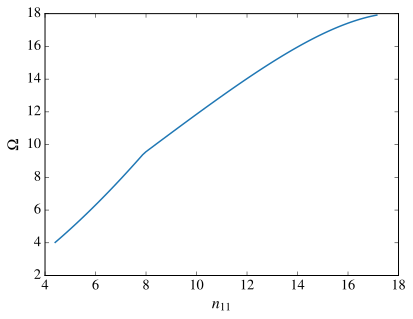

In [36]:
mpl.plot( n11_vec, Ω_vec )
mpl.xlabel( r'$n_{11}$')
mpl.ylabel( r'$\Omega$');

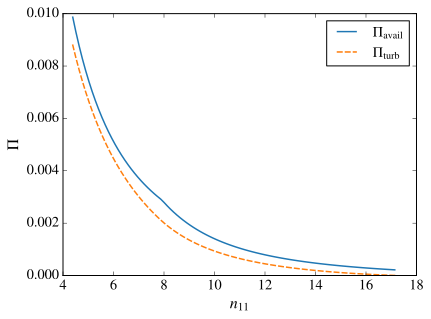

In [37]:
mpl.plot( n11_vec, Πa_vec, label=r'$\Pi_\mathrm{avail}$' )
mpl.plot( n11_vec, Πt_vec, label=r'$\Pi_\mathrm{turb}$' )
mpl.xlabel( '$n_{11}$')
mpl.ylabel( '$\Pi$')
mpl.legend();

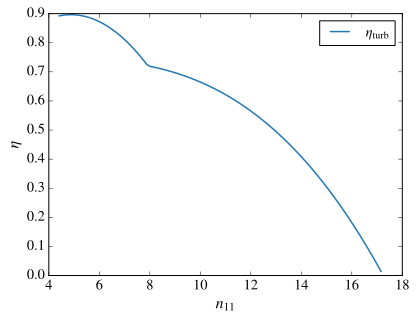

In [38]:
mpl.plot( n11_vec, η_vec, label=r'$\eta_\mathrm{turb}$' )
mpl.xlabel( r'$n_{11}$')
mpl.ylabel( r'$\eta$')
mpl.legend();